In [1]:
import numpy as np
import pandas as pd
import warnings
from rdkit import RDLogger
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from IPython.core.display import HTML
from rdkit.Chem.QED import qed
from rdkit.Chem import PandasTools
def show(df):
    return HTML(df.to_html(notebook=True))
PandasTools.RenderImagesInAllDataFrames(images=True)

In [2]:
#data_test=pd.read_csv('/home/cbe/AI4CHEM/reaction_predict/data_with_ASKCOS_score.csv')
data_test=pd.read_csv('/home/cbe/AI4CHEM/reaction_predict/suzuki_with_label_180_add_ASKCOS(forward).csv')

In [3]:
data_test['ASKCOS Forward score'].describe()

count    180.000000
mean       0.539672
std        0.441324
min        0.000000
25%        0.000000
50%        0.727750
75%        0.985650
max        1.000000
Name: ASKCOS Forward score, dtype: float64

/tmp/ipykernel_345955/1733759226.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data_test.groupby(['sim_range', 'label_x']).size().unstack()


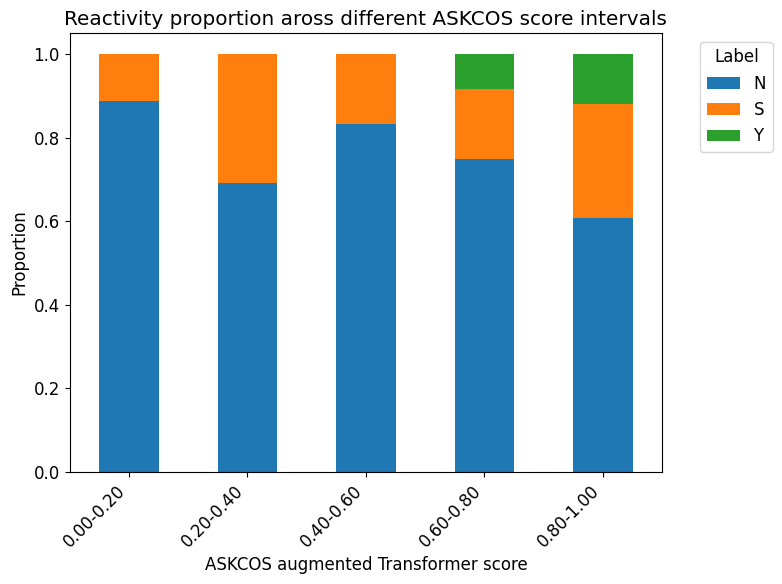

<Figure size 800x600 with 0 Axes>

In [22]:
import matplotlib.pyplot as plt
bins = [0.0, 0.20, 0.40, 0.60,0.80,1.00]
labels = ['0.00-0.20', '0.20-0.40','0.40-0.60', '0.60-0.80','0.80-1.00']
data_test['sim_range'] = pd.cut(data_test['ASKCOS Forward score'], bins=bins, labels=labels)
grouped = data_test.groupby(['sim_range', 'label_x']).size().unstack()

# 计算每个分组中 Y、S 和 N 的数量，并计算比例
total = grouped.sum(axis=1)
proportions = grouped.apply(lambda x: x / total)

# 设置图表大小和字体大小
plt.rcParams['figure.figsize'] = [8, 6]
plt.rcParams['font.size'] = 12

# 绘制堆叠条形图
ax = proportions.plot(kind='bar', stacked=True)

# 设置标题、标签和图例
ax.set_title('Reactivity proportion aross different ASKCOS score intervals')
ax.set_xlabel('ASKCOS augmented Transformer score')
ax.set_ylabel('Proportion')
ax.legend(title='Label', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# 调整布局
plt.tight_layout()

# 显示图表
plt.show()
plt.savefig('Figure 5e.png',dpi=300)

In [7]:
from scipy.stats import spearmanr

# 计算相似度与反应活性之间的斯皮尔曼相关系数
corr, p_value = spearmanr(data_test['ASKCOS Forward score'], data_test['label_x'], nan_policy='omit')

# 打印相关系数和p值
# print('Spearman correlation coefficient: {:.3f}'.format(corr))
# print('p-value: {:.3f}'.format(p_value))
print('Spearman correlation coefficient: ',corr)
print('p-value:',p_value)


Spearman correlation coefficient:  0.44321887935446075
p-value: 4.64108636940843e-10


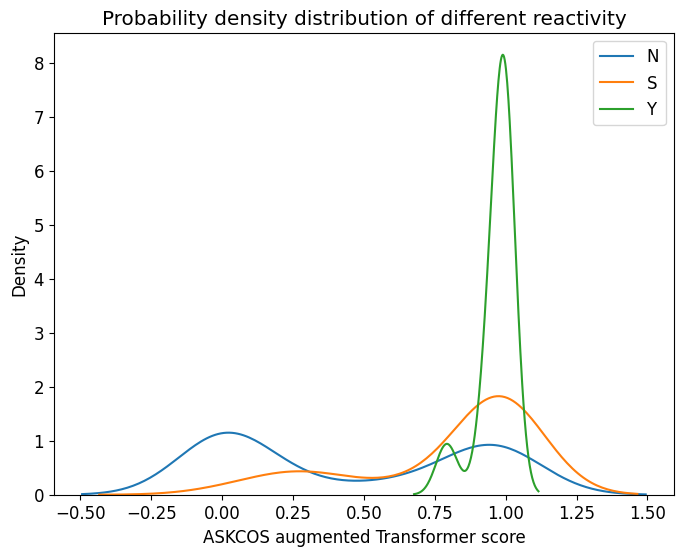

In [14]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df_Y = data_test[data_test['label_x'] == 'Y'].reset_index(drop=True)
df_N = data_test[data_test['label_x'] == 'N'].reset_index(drop=True)
df_S = data_test[data_test['label_x'] == 'S'].reset_index(drop=True)
sns.kdeplot(data=df_N['ASKCOS Forward score'].to_numpy(), label='N')
sns.kdeplot(data=df_S['ASKCOS Forward score'].to_numpy(), label='S')
sns.kdeplot(data=df_Y['ASKCOS Forward score'].to_numpy(), label='Y')
plt.xlabel('ASKCOS augmented Transformer score')
plt.title('Probability density distribution of different reactivity')
plt.legend()

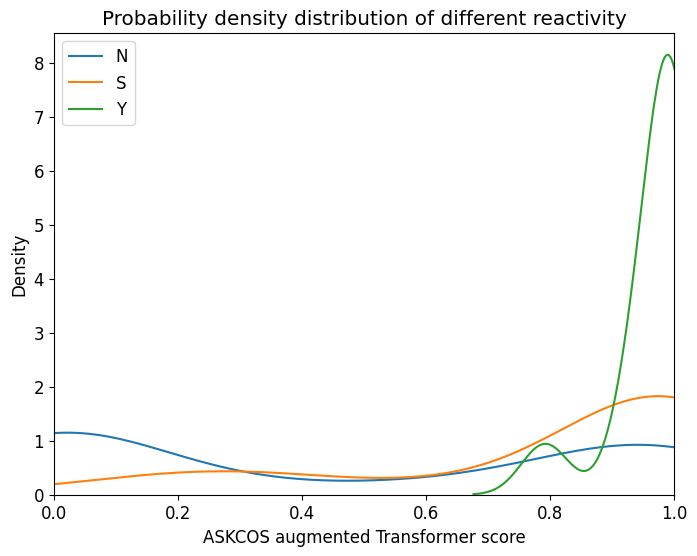

In [21]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df_Y = data_test[data_test['label_x'] == 'Y'].reset_index(drop=True)
df_N = data_test[data_test['label_x'] == 'N'].reset_index(drop=True)
df_S = data_test[data_test['label_x'] == 'S'].reset_index(drop=True)
sns.kdeplot(data=df_N['ASKCOS Forward score'].to_numpy(), label='N')
sns.kdeplot(data=df_S['ASKCOS Forward score'].to_numpy(), label='S')
sns.kdeplot(data=df_Y['ASKCOS Forward score'].to_numpy(), label='Y')
plt.xlabel('ASKCOS augmented Transformer score')
plt.title('Probability density distribution of different reactivity')
plt.legend(loc='upper left')
plt.xlim(0,1)
plt.savefig('Figure 5f.png',dpi=300)

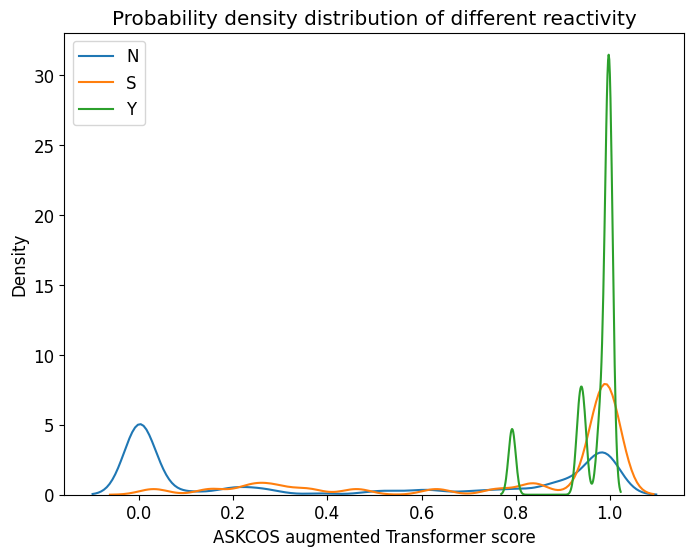

In [15]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df_Y = data_test[data_test['label_x'] == 'Y'].reset_index(drop=True)
df_N = data_test[data_test['label_x'] == 'N'].reset_index(drop=True)
df_S = data_test[data_test['label_x'] == 'S'].reset_index(drop=True)
sns.kdeplot(data=df_N['ASKCOS Forward score'].to_numpy(), bw_adjust=.2,label='N')
sns.kdeplot(data=df_S['ASKCOS Forward score'].to_numpy(), bw_adjust=.2,label='S')
sns.kdeplot(data=df_Y['ASKCOS Forward score'].to_numpy(), bw_adjust=.2,label='Y')
plt.xlabel('ASKCOS augmented Transformer score')
plt.title('Probability density distribution of different reactivity')
plt.legend()

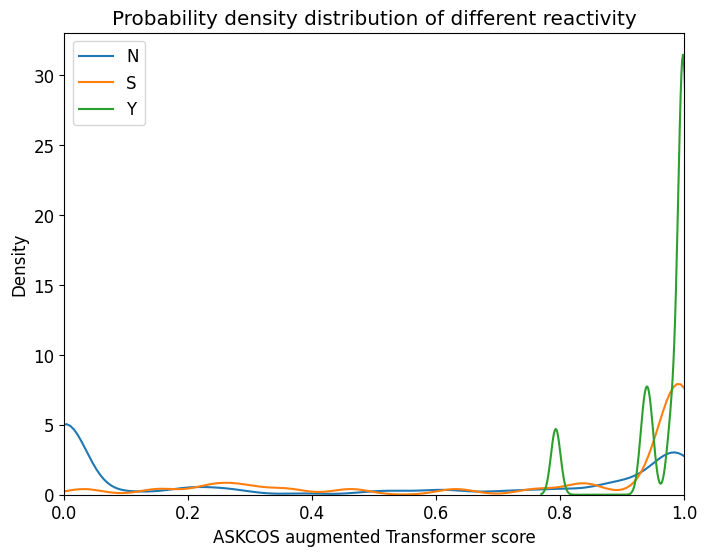

In [17]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
df_Y = data_test[data_test['label_x'] == 'Y'].reset_index(drop=True)
df_N = data_test[data_test['label_x'] == 'N'].reset_index(drop=True)
df_S = data_test[data_test['label_x'] == 'S'].reset_index(drop=True)
sns.kdeplot(data=df_N['ASKCOS Forward score'].to_numpy(), bw_adjust=.2,label='N')
sns.kdeplot(data=df_S['ASKCOS Forward score'].to_numpy(), bw_adjust=.2,label='S')
sns.kdeplot(data=df_Y['ASKCOS Forward score'].to_numpy(), bw_adjust=.2,label='Y')
plt.xlabel('ASKCOS augmented Transformer score')
plt.title('Probability density distribution of different reactivity')

plt.xlim(0, 1)
plt.legend(loc='upper left')